Parts of this assignment will be **automatically graded**. Please take note of the following:
- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).
- You can add additional cells, but it is not recommended to (re)move cells. Cells required for autograding cannot be moved and cells containing tests cannot be edited.
- You are allowed to use a service such as [Google Colaboratory](https://colab.research.google.com/) to work together. However, you **cannot** hand in the notebook that was hosted on Google Colaboratory, but you need to copy your answers into the original notebook and verify that it runs succesfully offline. This is because Google Colaboratory destroys the metadata required for grading.
- Name your notebook **exactly** `{TA_name}_{student1_id}_{student2_id}_lab{i}.ipynb`, for example `wouter_12345_67890_lab1.ipynb` (or tim|elise|david|qi, depending on your TA), **otherwise your submission will be skipped by our regex and you will get 0 points** (but no penalty as we cannot parse your student ids ;)).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your names below:

In [1]:
NAMES = "Masoumeh Bakhtiariziabari"

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm as _tqdm

def tqdm(*args, **kwargs):
    return _tqdm(*args, **kwargs, mininterval=1)  # Safety, do not overflow buffer

%matplotlib inline

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [3]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from mpl_toolkits.mplot3d import Axes3D

---
## 1. Policy Evaluation (1 point)

In this exercise we will evaluate a policy, e.g. find the value function for a policy. The problem we consider is the gridworld from Example 4.1 in the book. The environment is implemented as `GridworldEnv`, which is a subclass of the `Env` class from [OpenAI Gym](https://github.com/openai/gym). This means that we can interact with the environment. We can look at the documentation to see how we can interact with the environment.

In [4]:
from gridworld import GridworldEnv
env = GridworldEnv()
# Lets see what this is
?env

In [5]:
# To have a quick look into the code
??env

Now we want to evaluate a policy by using Dynamic Programming. For more information, see the [Intro to RL](https://drive.google.com/open?id=1opPSz5AZ_kVa1uWOdOiveNiBFiEOHjkG) book, section 4.1. This algorithm requires knowledge of the problem dynamics in the form of the transition probabilities $p(s',r|s,a)$. In general these are not available, but for our gridworld we know the dynamics and these can be accessed as `env.P`.

In [6]:
# Take a moment to figure out what P represents. 
# Note that this is a deterministic environment. 
# What would a stochastic environment look like?
env.P

{0: {0: [(1.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True)],
  2: [(1.0, 0, 0.0, True)],
  3: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 5, -1.0, False)],
  3: [(1.0, 0, -1.0, True)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 6, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 0, -1.0, True)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 8, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 5: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 6, -1.0, False)],
  2: [(1.0, 9, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 5, -1.0, False)]},
 7: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {0: [(1.0, 4

In [7]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    while True:
#         # YOUR CODE HERE
#         raise NotImplementedError()
        new_v = np.zeros(env.nS)
        
        for s in range(env.nS):
            for a in range(env.nA):
                prob, next_state, reward, _ = env.P[s][a][0]
                new_v[s] += policy[s][a] * prob * (reward + discount_factor* V[next_state])
        
        #if np.allclose(new_v, V, theta):
        
        #print(new_v - V)
        #if np.sum (np.abs( new_v - V ) ) <= theta :
        if np.sum(np.abs(new_v - V)<=theta) == np.size(V):
            V = new_v
            break
        #else:
        V = new_v
    return np.array(V)

In [8]:
# Let's run your code, does it make sense?
random_policy = np.ones([env.nS, env.nA]) / env.nA
V = policy_eval(random_policy, env)
V

array([  0.        , -13.99989315, -19.99984167, -21.99982282,
       -13.99989315, -17.99986052, -19.99984273, -19.99984167,
       -19.99984167, -19.99984273, -17.99986052, -13.99989315,
       -21.99982282, -19.99984167, -13.99989315,   0.        ])

In [9]:
random_policy[1][2]

0.25

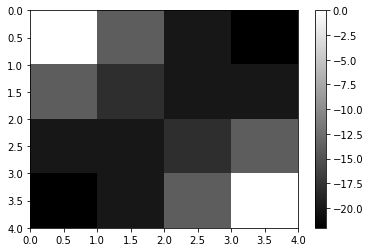

In [10]:
def plot_gridworld_value(V):
    plt.figure()
    c = plt.pcolormesh(V, cmap='gray')
    plt.colorbar(c)
    plt.gca().invert_yaxis()  # In the array, first row = 0 is on top

# Making a plot always helps
plot_gridworld_value(V.reshape(env.shape))

In [11]:
# Test: When you hand in the nodebook we will check that the value function is (approximately) what we expected
# but we need to make sure it is at least of the correct shape
v = policy_eval(random_policy, env)
assert v.shape == (env.nS)

---
## 2. Policy Iteration (2 points)
Using the policy evaluation algorithm we can implement policy iteration to find a good policy for this problem. Note that we do not need to use a discount_factor for episodic tasks but make sure your implementation can handle this correctly!

In [12]:
def policy_improvement(env, discount_factor=1.0):
    """
    Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """
    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    while True:
        V = policy_eval(policy, env, discount_factor)
        policy_stable = True

        for s in range(env.nS):
            chosen_action = np.argmax(policy[s])    
            for a in range(env.nA):
                prob, next_state, reward, _ = env.P[s][a][0]
                policy[s][a] = prob * (reward + discount_factor* V[next_state])
            
            best_action = np.argmax(policy[s])
            policy[s] = [1 if i==best_action else 0 for i in range(len(policy[s]))]
            
            if best_action != chosen_action:
                policy_stable = False
                
        if policy_stable:
            break
            
        
#         # YOUR CODE HERE
#         raise NotImplementedError()

    
    return policy, V

Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
^<<v
^^^v
^^>v
^>>^

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]



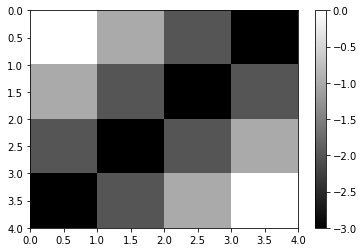

In [13]:
# Let's see what it does
policy, v = policy_improvement(env)
print("Policy Probability Distribution:")
print(policy)
print("")

def print_grid_policy(policy, symbols=["^", ">", "v", "<"]):
    symbols = np.array(symbols)
    for row in policy:
        print("".join(symbols[row]))

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

plot_gridworld_value(v.reshape(env.shape))

In [14]:
# This is not an empty cell. It is needed for grading.

---
## 3. Value Iteration (3 points)
Now implement the value iteration algorithm.

In [15]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.        
    """
    

    V = np.zeros(env.nS)
    policy = np.zeros([env.nS, env.nA])
    
#     # Implement!
#     # YOUR CODE HERE
#     raise NotImplementedError()
    
    while True:
        old_v = copy.deepcopy(V)
        for s in range(env.nS):
            chosen_action = np.argmax(policy[s])    
            for a in range(env.nA):
                prob, next_state, reward, _ = env.P[s][a][0]
                policy[s][a] = prob * (reward + discount_factor* V[next_state])
            
            best_action = np.argmax(policy[s])
            policy[s] = [1 if i==best_action else 0 for i in range(len(policy[s]))]
            
            best_prob, best_next_state, best_reward, _ = env.P[s][best_action][0]
            V[s] = best_reward + discount_factor* V[best_next_state]
            
        if np.sum(np.abs(old_v - V)<=theta) == np.size(V):
            break
    
    return policy, V

In [16]:
# Oh let's test again
# Let's see what it does
policy, v = value_iteration(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")


Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
^<<v
^^^v
^^>v
^>>^

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]



What is the difference between value iteration and policy iteration? Which algorithm is most efficient (e.g. needs to perform the least *backup* operations)? Please answer *concisely* in the cell below.

####  ANSWER:

Policy iteration is a way of finding an optimal policy by combining policy evaluation and policy improvement.One drawback to policy iteration is that each of its iterations involves policy evaluation, which may itself be a protracted iterative computation requiring multiple sweeps through the state set. The policy evaluation step of policy iteration can be truncated in several ways without losing the convergence guarantees of policy iteration. One important special case is when policy evaluation is stopped after just one sweep (one update of each state). This algorithm is called value iteration. Value iteration is obtained simply by turning the Bellman optimality equation into an update rule. Value iteration efectively combines, in each of its sweeps, one sweep of policy evaluation and one sweep of policy improvement and in value iteration Unlike policy iteration, there is no explicit policy.

Faster convergence is often achieved by interposing multiple policy evaluation sweeps between each policy improvement sweep. Both policy iteration and value iteration are widely used, and it is not clear which, if either, is better in general. In practice, these methods usually converge much faster than their theoretical worst-case run times, particularly if they are started with good initial value functions or policies.

Policy iteration is usually slower than value iteration for a large number of possible states.




## 4. Monte Carlo Prediction (7 points)
What is the difference between Dynamic Programming and Monte Carlo? When would you use the one or the other algorithm?

####  ANSWER:

Dynamic programing is model based while monte Carlo can be both model based and model free. In DP agent does need to travel till the terminal state to get the expected reward but in Monte carlo since it is sampling based algorithm agent has to travel till the terminal state to get the expected rewards. DP is bootstraping based where MC is sampling base. If details of environmets are known DP is expected to return more accurate evaluations and if it is unknown we won't be able to use DP and if system is episodic we can use MC instead of DP, otherwise TD.

#### Advantages of MC w.r.t. DP:

- All of the probabilities must be computed before DP can be applied, and such computations are often complex and error-prone. In contrast, generating the sample games required by Monte Carlo methods is easy. This is the case surprisingly often; the ability of Monte Carlo methods to work with sample episodes alone can be a signiﬁcant advantage even when one has complete knowledge of the environment’s dynamics
-  In Monte Carlo methods estimates for each state are independent. The estimate for one state does not build upon the estimate of any other state, as is the case in DP. In other words, Monte Carlo methods do not bootstrap as DP.
-  In MC the computational expense of estimating the value of a single state is independent of the number of states. This can make Monte Carlo methods particularly attractive when one requires the value of only one or a subset of states.  One can generate many sample episodes starting from the states of interest, averaging returns from only these states, ignoring all others.


For the Monte Carlo Prediction we will look at the Blackjack game (Example 5.1 from the book), for which the `BlackjackEnv` is implemented in `blackjack.py`. Note that compared to the gridworld, the state is no longer a single integer, which is why we use a dictionary to represent the value function instead of a numpy array. By using `defaultdict`, each state gets a default value of 0.

In [17]:
from blackjack import BlackjackEnv
env = BlackjackEnv()

For the Monte Carlo algorithm, we need to *interact* with the environment. This means that we start an episode by using `env.reset` and send the environment actions via `env.step` to observe the reward and next observation (state).

In [18]:
# So let's have a look at what we can do in general with an environment...
import gym
?gym.Env

In [19]:
# We can also look at the documentation/implementation of a method
?env.step

In [20]:
??BlackjackEnv

A very simple policy for Blackjack is to *stick* if we have 20 or 21 points and *hit* otherwise. We want to know how good this policy is. This policy is *deterministic* and therefore a function that maps an observation to a single action. Technically, we can implement this as a dictionary or as a function, where we use the latter. To get started, let's implement this simple policy for BlackJack.

In [21]:
def simple_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    # YOUR CODE HERE
#     raise NotImplementedError()
    if observation[0] >= 20:
      return 0
    else:
      return 1

In [22]:
s = env.reset()
print(s)
a = simple_policy(s)
print(env.step(a))

(13, 10, False)
((23, 10, False), -1, True, {})


Now implement either the MC prediction algorithm (either first visit or every visit). Hint: you can use `for i in tqdm(range(num_episodes))` to show a progress bar.

In [23]:
from collections import defaultdict

def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # YOUR CODE HERE
#     raise NotImplementedError()
    for i in tqdm(range(num_episodes)):
        
        obs = env.reset()
        
        # Generate whole trajectory before any update
        visited_states_rewards = []
        
        final_state = False
        while not final_state:
            action = policy(obs)
            new_obs, reward, final_state, info = env.step(action)
            visited_states_rewards.append((obs, reward))
            obs = copy.deepcopy(new_obs)
        
        #Loop backwards in time and calculate G
        G = 0
        for t in range(len(visited_states_rewards) - 1, -1, -1):
            G = discount_factor * G + visited_states_rewards[t][1]
            cur_state = visited_states_rewards[t][0]
            
            seen = False
            for j in range(t):
                if cur_state == visited_states_rewards[j][0]:
                    seen = True
                    break
            if not seen:
                returns_sum[cur_state] += G
                returns_count[cur_state] += 1
                V[cur_state] = float(returns_sum[cur_state])/returns_count[cur_state] 
    
    return V

In [24]:
V = mc_prediction(simple_policy, env, num_episodes=1000)
print(V)

100%|██████████| 1000/1000 [00:00<00:00, 6631.98it/s]

defaultdict(<class 'float'>, {(12, 10, False): -0.5652173913043478, (18, 4, False): -1.0, (15, 10, False): -0.6578947368421053, (14, 6, False): -0.75, (21, 6, True): 1.0, (16, 10, False): -0.6530612244897959, (17, 10, False): -0.5961538461538461, (14, 10, False): -0.6590909090909091, (19, 7, False): -1.0, (13, 7, False): -0.3333333333333333, (16, 3, False): -0.8, (15, 7, False): -0.6923076923076923, (18, 9, False): -0.6923076923076923, (14, 9, False): -0.6, (13, 9, False): -0.8181818181818182, (13, 10, False): -0.6428571428571429, (19, 10, False): -0.6382978723404256, (19, 8, False): -1.0, (18, 8, False): -1.0, (15, 5, False): -0.4, (21, 8, False): 0.8, (13, 8, False): -0.5454545454545454, (12, 8, False): -0.6363636363636364, (14, 3, False): -0.5555555555555556, (19, 1, False): -0.7777777777777778, (19, 1, True): -1.0, (13, 1, True): -1.0, (20, 5, False): 0.875, (18, 7, False): -0.5, (14, 8, False): -0.7142857142857143, (15, 4, False): -0.5555555555555556, (17, 4, True): -1.0, (16, 8, 

Now make *4 plots* like Figure 5.1 in the book. You can either make 3D plots or heatmaps. Make sure that your results look similar to the results in the book. Give your plots appropriate titles, axis labels, etc.

In [25]:
%%time
# Let's run your code one time
V_10k = mc_prediction(simple_policy, env, num_episodes=10000)
V_500k = mc_prediction(simple_policy, env, num_episodes=500000)

100%|██████████| 500000/500000 [01:02<00:00, 7985.04it/s]

CPU times: user 1min 3s, sys: 59.3 ms, total: 1min 3s
Wall time: 1min 3s


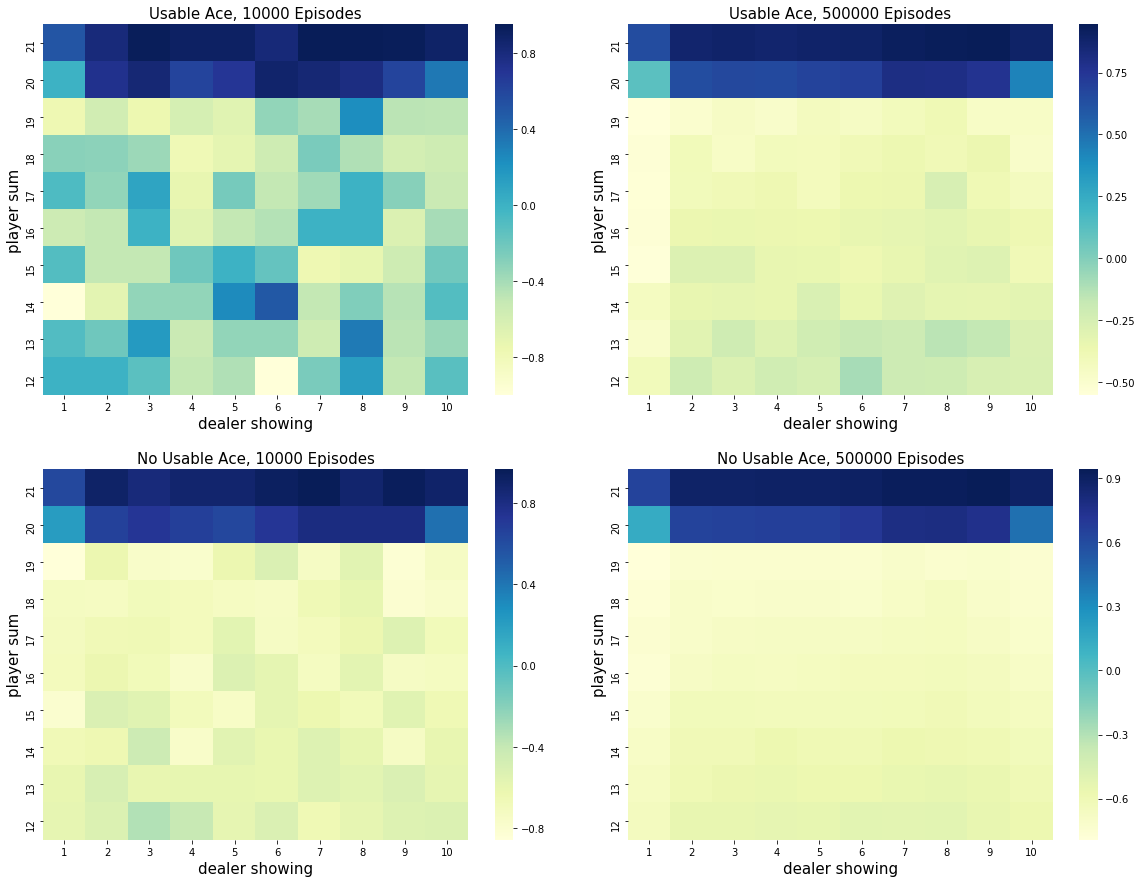

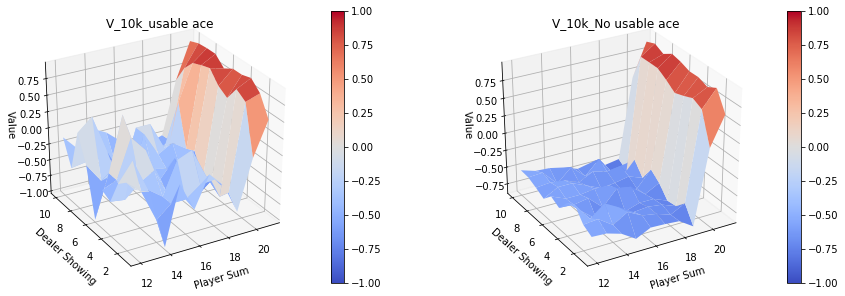

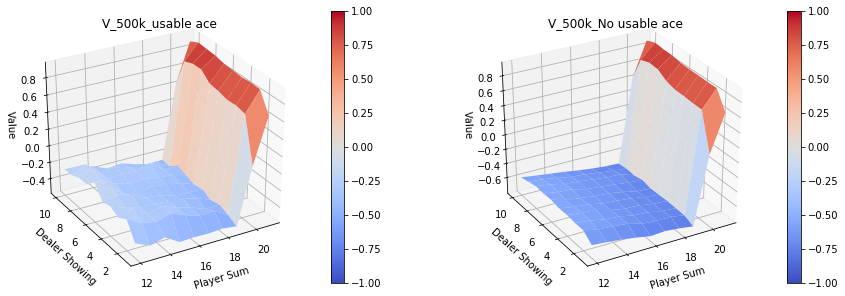

In [26]:
# codes for plots from https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter05/blackjack.py
grid_size = 10

usable_10k = np.zeros([grid_size, grid_size])
unusable_10k = np.zeros([grid_size, grid_size])
usable_500k = np.zeros([grid_size, grid_size])
unusable_500k = np.zeros([grid_size, grid_size])

for s in V_10k:
    player, dealer , usable = s
    if player > 21:
        continue
    if usable:
        usable_10k[player - 12][dealer-1] = V_10k[s]
    else:
        unusable_10k[player - 12][dealer-1] = V_10k[s]

for s in V_500k:    
    player, dealer , usable = s
    if player > 21:
        continue
    if usable:
        usable_500k[player - 12][dealer-1] = V_500k[s]
    else:
        unusable_500k[player - 12][dealer-1] = V_500k[s]
        

states = [usable_10k,
          usable_500k,
          unusable_10k,
          unusable_500k]

titles = ['Usable Ace, 10000 Episodes',
          'Usable Ace, 500000 Episodes',
          'No Usable Ace, 10000 Episodes',
          'No Usable Ace, 500000 Episodes']

_, axes = plt.subplots(2, 2, figsize=(20, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()

for state, title, ax in zip(states, titles, axes):
    fig = sns.heatmap(np.flipud(state), cmap="YlGnBu", ax=ax, xticklabels=range(1, 11), yticklabels=list(reversed(range(12, 22))))
    fig.set_ylabel('player sum', fontsize=15)
    fig.set_xlabel('dealer showing', fontsize=15)
    fig.set_title(title, fontsize=15)

plt.show()
plt.close()

# ---------------------------------------------------------





def surface_plots(fig,index, X, Y, Z, title = None):
#     fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,2,index, projection='3d')
#     ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
    
    ax.set_xlabel('Player Sum')
    ax.set_ylabel('Dealer Showing')
    ax.set_zlabel('Value')
    ax.set_title(title)
    ax.view_init(ax.elev, -120)
    fig.colorbar(surf)
#     plt.show()
    
def plot_function(V, title=None):
    
    #player     
    min_x = min([key[0] for key in V.keys()])
    max_x = max([key[0] for key in V.keys()])
    
    #dealer
    min_y = min([key[1] for key in V.keys()])
    max_y = max([key[1] for key in V.keys()])
    
    X = np.arange(min_x, max_x+1)
    Y = np.arange(min_y, max_y+1)
    
    X, Y = np.meshgrid(X, Y)
    
    #get values for usable ace and Non usable ace
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace   = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))
        
    fig = plt.figure(figsize=(15, 5))
    
    surface_plots(fig, 1, X, Y, Z_ace,  title +"_"+'usable ace')
    surface_plots(fig, 2, X, Y, Z_noace, title +"_"+'No usable ace')
    
plot_function(V_10k, "V_10k")
plot_function(V_500k, "V_500k")

## 5. Monte Carlo control with $\epsilon$-greedy policy (5 points)
Now we have a method to evaluate state-values given a policy. Take a moment to think whether we can use the value function to find a better policy? Assuming we do not know the dynamics of the environment, why is this not possible?

We want a policy that selects _actions_ with maximum value, e.g. is _greedy_ with respect to the _action-value_ (or Q-value) function $Q(s,a)$. We need to keep exploring, so with probability $\epsilon$ we will take a random action. First, lets implement a function `make_epsilon_greedy_policy` that takes the Q-value function and returns an $\epsilon$-greedy policy. The policy itself is a function that returns an action.

#### ANSWER:

No, we can not use the value function to find a better policy. because when we use MC many state–action pairs may never be visited. If  $\pi$ is a deterministic policy, then in following $\pi$ one will observe returns only for one of the actions from each state. With no returns to average, the Monte Carlo estimates of the other actions will not improve with experience. This is a serious problem because the purpose of learning action values is to help in choosing among the actions available in each state. To compare alternatives we need to estimate the value of all the actions from each state, not just the one we currently favor.


In [27]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        an action according to the epsilon-greedy policy.
    
    """
    def policy_fn(observation):
        # YOUR CODE HERE
#         raise NotImplementedError()    
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    
    return policy_fn

In [28]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Again, keep track of counts for efficiency
    # returns_sum, returns_count and Q are 
    # nested dictionaries that map state -> (action -> action-value).
    # We could also use tuples (s, a) as keys in a 1d dictionary, but this
    # way Q is in the format that works with make_epsilon_greedy_policy
    
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    returns_count = defaultdict(lambda: np.zeros(env.action_space.n, dtype=int))
    
    # The final action-value function.
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    for i in tqdm(range(num_episodes)):
        
        obs = env.reset()
        
        # Generate whole trajectory before any update
        visited_s_a_r = []
        
        final_state = False
        while not final_state:
            action_probs = policy(obs)
            action = np.random.choice(range(len(action_probs)), p=action_probs)
            next_obs, reward, final_state, info = env.step(action)            
            visited_s_a_r.append((obs, action, reward))
            obs = copy.deepcopy(next_obs)
        
        #Loop backwards in time and calculate G
        G = 0
        for t in range(len(visited_s_a_r) - 1, -1, -1):
            cur_state = visited_s_a_r[t][0]
            cur_action = visited_s_a_r[t][1]
            cur_reward = visited_s_a_r[t][2]
            G = discount_factor * G + visited_s_a_r[t][2]
            
            seen = False
            for j in range(t):
                if cur_state == visited_s_a_r[j][0] and cur_reward == visited_s_a_r[j][2]:
                    seen = True
                    break
            if not seen:
                returns_sum[cur_state][cur_action] += G
                returns_count[cur_state][cur_action] += 1
                Q[cur_state][cur_action] = float(returns_sum[cur_state][cur_action])/ returns_count[cur_state][cur_action]

    
    return Q, policy

# Test it quickly
Q, policy = mc_control_epsilon_greedy(env, num_episodes=10000, epsilon=0.1)

100%|██████████| 10000/10000 [00:02<00:00, 3968.35it/s]


In [29]:
%%time
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

100%|██████████| 500000/500000 [02:14<00:00, 3722.78it/s]

CPU times: user 2min 14s, sys: 658 ms, total: 2min 15s
Wall time: 2min 14s


How can you obtain the (V-)value function from the Q-value function? Plot the (V-)value function that is the result of 500K iterations. Additionally, visualize the greedy policy similar to Figure 5.2 in the book. Use a white square for hitting, black for sticking.

####  ANSWER:

We can obtain value function of a state by getting the maximum value between all Q-values of all actions from that state. 

In plot on right column, dark blue represents sticking and light yellow is for hitting.

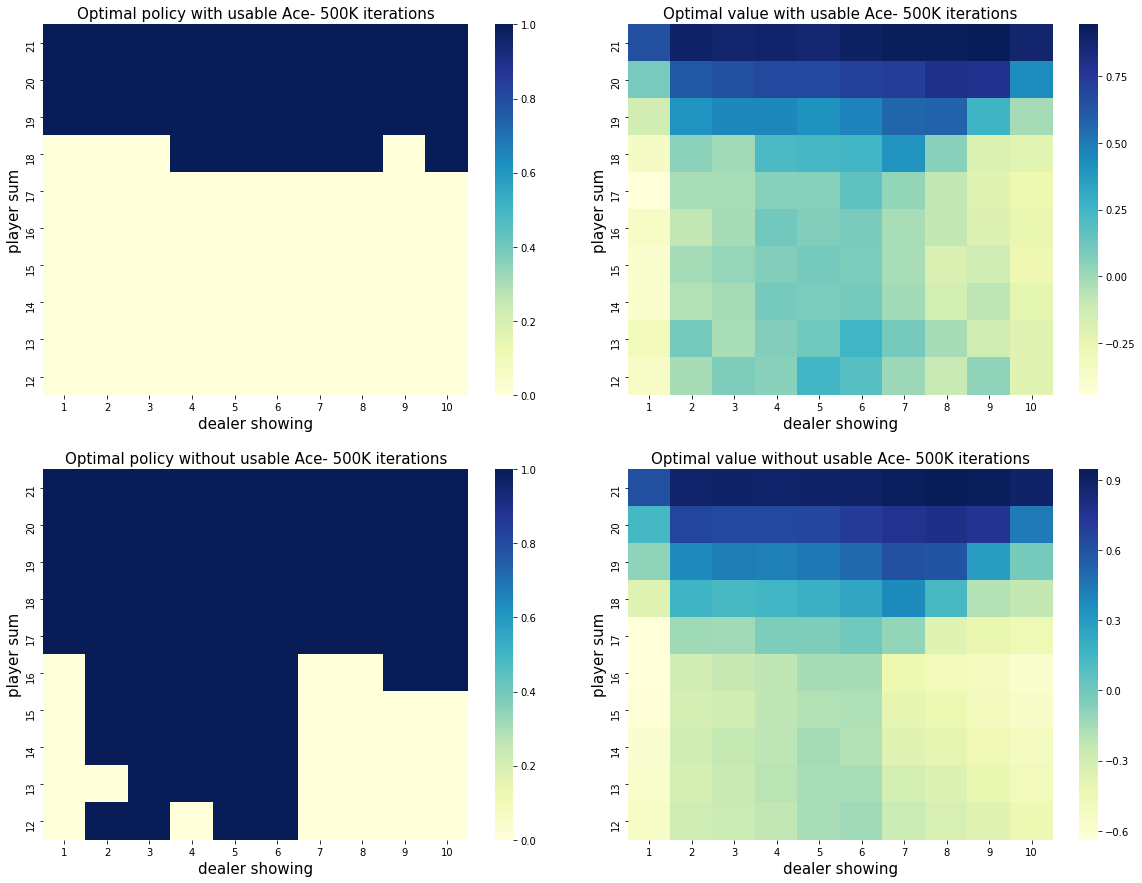

In [30]:
# YOUR CODE HERE
# raise NotImplementedError()
def plot_policy(Q, policy, title=None):
    grid_size = 10

    state_value_usable_ace = np.zeros([grid_size, grid_size])
    state_value_no_usable_ace = np.zeros([grid_size, grid_size])

    action_usable_ace = np.zeros([grid_size, grid_size])
    action_no_usable_ace = np.zeros([grid_size, grid_size])


    for s in Q.keys():    
        player, dealer , usable = s
        if player > 21:
            continue
        if usable:
            state_value_usable_ace[player - 12][dealer-1] = np.amax(Q[s])
            action_usable_ace[player - 12][dealer-1] = 1 -np.argmax(Q[s])
        else:
            state_value_no_usable_ace[player - 12][dealer-1] = np.amax(Q[s])
            action_no_usable_ace[player - 12][dealer-1] = 1 - np.argmax(Q[s])


    images = [action_usable_ace,
              state_value_usable_ace,
              action_no_usable_ace,
              state_value_no_usable_ace]

    titles = ['Optimal policy with usable Ace- '+title + ' iterations',
              'Optimal value with usable Ace- '+title + ' iterations',
              'Optimal policy without usable Ace- '+title + ' iterations',
              'Optimal value without usable Ace- '+title + ' iterations']

    _, axes = plt.subplots(2, 2, figsize=(20, 15))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    axes = axes.flatten()

    for image, title, axis in zip(images, titles, axes):
        fig = sns.heatmap(np.flipud(image), cmap="YlGnBu", ax=axis, xticklabels=range(1, 11),
                          yticklabels=list(reversed(range(12, 22))))
        fig.set_ylabel('player sum', fontsize=15)
        fig.set_xlabel('dealer showing', fontsize=15)
        fig.set_title(title, fontsize=15)
        
plot_policy(Q, policy, "500K")

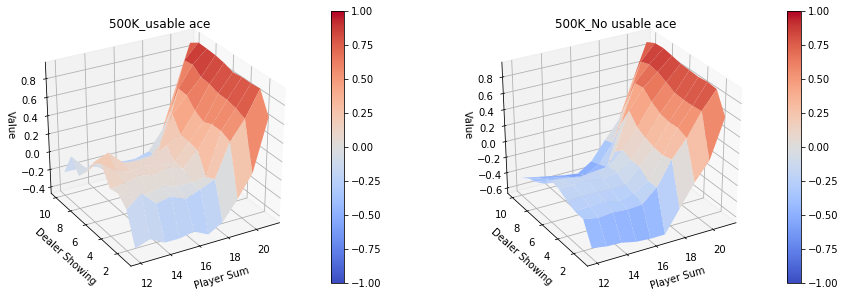

In [31]:
# YOUR CODE HERE
V = defaultdict(float)
for s, a in Q.items():
    V[s] = np.amax(a)
plot_function(V, "500K")